# Machine Learning models on Mismatch Response data

In this notebook: 
- Necessary imports
- Split data
- Scale data
- SVM model 
- Logistic Regression model
- Decision Tree model
- MLP model
- Convolutional Neural Network

The models will predict whether a child is at risk for dyslexia or not based on the variable `Group_AccToParents`. The hyperparameters will be selected using gridsearch. 

## Imports

In [1]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import seaborn as sn
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import epod_models # remove once new version of eegyolk is up
import eegyolk
# from eegyolk import epod_models

2022-11-08 17:01:19.776488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 17:01:19.887475: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-08 17:01:19.917200: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 17:01:20.443466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Select approach

Each dataset refers to a different approach. Select the button of dataset of interest. 

In [2]:
csv = widgets.RadioButtons(
    options=['df_mmr_ch_complete.csv', 'df_mmr_ch_literature.csv', 'df_mmr_ch_ttest.csv', 'df_mmr_ch_connectivity.csv'],
    description='Pick sensors',
    disabled=False
)
display(csv)

RadioButtons(description='Pick sensors', options=('df_mmr_ch_complete.csv', 'df_mmr_ch_literature.csv', 'df_mm…

In [3]:
csv = str(csv.value)
df = pd.read_csv(csv, sep = ',')

The t-test and connectivity approach used 30% of the dataset on analysis. Those participants will be excluded from the model training and validation. 

In [4]:
if csv=='df_mmr_ch_ttest.csv' or csv=='df_mmr_ch_connectivity.csv':
    df = df[30:]

## Split data

The data needs to be divided in a training and validation set. This will be done using the sklearn method `train_test_split`. Before splitting the target variable y needs to be defined and the independend variables X. 

In [5]:
y = df['Group_AccToParents'].values # dependent variable
X = df.drop(['Group_AccToParents'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale data

The data needs to make it easier for a model to find patterns. The `StandardScaler` from sklearn is used for this. 

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Select model

In [7]:
model_pick = widgets.RadioButtons(
    options=['SVM', 'Logistic Regression', 'Decision Tree', 'Multi Layer Perceptron', 'Convolutional Neural Network'],
    description='Pick model:',
    disabled=False
)
display(model_pick)

RadioButtons(description='Pick model:', options=('SVM', 'Logistic Regression', 'Decision Tree', 'Multi Layer P…

In [8]:
model_pick = str(model_pick.value)

## Models

The models are stored in the eegyolk library `epod_models.py`. The selected model will be called from the library and executed. 

2022-11-08 17:01:29.717963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 17:01:29.749511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-08 17:01:29.749533: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-08 17:01:29.751269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Epoch 1/50
40/40 [==============================] - 1s 6ms/step - loss: 0.6782 - accuracy: 0.6125 - val_loss: 0.7230 - val_accuracy: 0.4286
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6500 - val_loss: 0.7018 - val_accuracy: 0.4286
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.6500 - val_loss: 0.6864 - val_accuracy: 0.4286
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.6625 - val_loss: 0.6717 - val_accuracy: 0.4286
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.6625 - val_loss: 0.6634 - val_accuracy: 0.4286
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.6625 - val_loss: 0.6623 - val_accuracy: 0.4286
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.6625 - val_loss: 0.6638 - val_accuracy: 0.4286
Epoch 8/50
40/40 [==

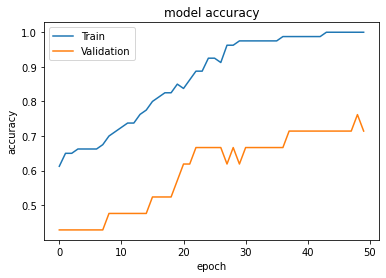

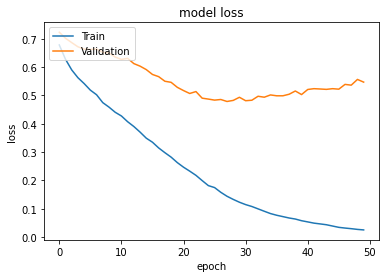

In [9]:
if model_pick == 'SVM':
    svm = epod_models.SVM(X, y, X_train, y_train, X_test, y_test)
if model_pick == 'Logistic Regression':
    lr = epod_models.LR(X, y, X_train, y_train, X_test, y_test)
if model_pick == 'Decision Tree':
    dt = epod_models.DT(X, y, X_train, y_train, X_test, y_test)
if model_pick == 'Multi Layer Perceptron':
    mlp = epod_models.MLP(X, y, X_train, y_train, X_test, y_test)
if model_pick == 'Convolutional Neural Network':    
    cnn = epod_models.CNN(df, 50, 2)